In [1]:
#include all the modules here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\nstep\TSU\SeniorProject\USAAirbnb.csv",
                 sep=';', header=None, skiprows = 0)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
1,16163330,https://www.airbnb.com/rooms/16163330,20170510102046,2017-05-10,Quiet Space to sleep & rest,"Hello. Small bedroom with twin bed, chair, ni...",NaN,"Hello. Small bedroom with twin bed, chair, ni...",none,NaN,...,10,9,10,NaN,"Illinois State, Cook County, IL, CHICAGO",strict,2,3.49,"41.91128175345432, -87.70246313637992","Host Has Profile Pic,Is Location Exact,Require..."
2,6846209,https://www.airbnb.com/rooms/6846209,20170510102046,2017-05-10,Rogue Philanthropy Manor,Our Humboldt Park home features 1.5 bathrooms ...,Old 120-year-old farm house appeal. Not a typ...,Our Humboldt Park home features 1.5 bathrooms ...,none,Humboldt Park is an emerging Chicago neighborh...,...,10,9,10,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,1,1.82,"41.90666965800253, -87.71429140769317","Host Is Superhost,Host Has Profile Pic,Host Id..."
3,6448745,https://www.airbnb.com/rooms/6448745,20170510102046,2017-05-10,1 Bedroom in Beautiful Humboldt Park,Come stay in the beautiful Humboldt Park Neigh...,This is a private room with a queen bed locate...,Come stay in the beautiful Humboldt Park Neigh...,none,The park has a lot to offer. -tennis courts / ...,...,10,10,10,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,1,2.0,"41.905263970734715, -87.710297490264","Host Has Profile Pic,Host Identity Verified,Is..."
4,18139782,https://www.airbnb.com/rooms/18139782,20170510102046,2017-05-10,Private Entry 2 Bdrm near Transit,This sunny 2nd floor 2 bedroom unit is newly r...,"A private, locked remodeled 2 bedroom, 1 bathr...",This sunny 2nd floor 2 bedroom unit is newly r...,none,Humboldt Park is a diverse and vibrant communi...,...,10,9,10,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,2,6.0,"41.89635191197846, -87.72976298046008","Host Has Profile Pic,Host Identity Verified,Re..."


In [4]:
df.columns = df.iloc[0]
df = df[1:]
df.head()
#df.to_csv("AirbnbDataSet.csv", index=False)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
1,16163330,https://www.airbnb.com/rooms/16163330,20170510102046,2017-05-10,Quiet Space to sleep & rest,"Hello. Small bedroom with twin bed, chair, ni...",NaN,"Hello. Small bedroom with twin bed, chair, ni...",none,NaN,...,10,9,10,NaN,"Illinois State, Cook County, IL, CHICAGO",strict,2,3.49,"41.91128175345432, -87.70246313637992","Host Has Profile Pic,Is Location Exact,Require..."
2,6846209,https://www.airbnb.com/rooms/6846209,20170510102046,2017-05-10,Rogue Philanthropy Manor,Our Humboldt Park home features 1.5 bathrooms ...,Old 120-year-old farm house appeal. Not a typ...,Our Humboldt Park home features 1.5 bathrooms ...,none,Humboldt Park is an emerging Chicago neighborh...,...,10,9,10,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,1,1.82,"41.90666965800253, -87.71429140769317","Host Is Superhost,Host Has Profile Pic,Host Id..."
3,6448745,https://www.airbnb.com/rooms/6448745,20170510102046,2017-05-10,1 Bedroom in Beautiful Humboldt Park,Come stay in the beautiful Humboldt Park Neigh...,This is a private room with a queen bed locate...,Come stay in the beautiful Humboldt Park Neigh...,none,The park has a lot to offer. -tennis courts / ...,...,10,10,10,City registration pending,"Illinois State, Cook County, IL, CHICAGO",moderate,1,2.0,"41.905263970734715, -87.710297490264","Host Has Profile Pic,Host Identity Verified,Is..."
4,18139782,https://www.airbnb.com/rooms/18139782,20170510102046,2017-05-10,Private Entry 2 Bdrm near Transit,This sunny 2nd floor 2 bedroom unit is newly r...,"A private, locked remodeled 2 bedroom, 1 bathr...",This sunny 2nd floor 2 bedroom unit is newly r...,none,Humboldt Park is a diverse and vibrant communi...,...,10,9,10,City registration pending,"Illinois State, Cook County, IL, CHICAGO",flexible,2,6.0,"41.89635191197846, -87.72976298046008","Host Has Profile Pic,Host Identity Verified,Re..."
5,12467112,https://www.airbnb.com/rooms/12467112,20170510102046,2017-05-10,Beautiful Eco-Friendly Room in Garfield Park,Come stay with us in our beautiful home in Chi...,The house is beautifully refurbished with dark...,Come stay with us in our beautiful home in Chi...,none,"Historically, this neighborhood was a retreat ...",...,10,8,9,City registration pending,"Illinois State, Cook County, IL, CHICAGO",strict,3,6.58,"41.887172332630705, -87.70764984198293","Host Has Profile Pic,Host Identity Verified,Is..."


In [5]:
subsetdf = df.drop(["Listing Url","Last Scraped","Name","Summary","Space","Description",
                    "Experiences Offered","Neighborhood Overview","Notes","Transit",
                    "Scrape ID","Access","Interaction","House Rules","Thumbnail Url",
                    "Medium Url","Picture Url","License","Jurisdiction Names",
                    "Cancellation Policy","Calculated host listings count","XL Picture Url","Host URL",
                   "Host Name","Host About","Host Response Time","Host Since","Host Location"
                    ,"Host Response Rate","Host Thumbnail Url","Host Picture Url",
                    "Host Acceptance Rate","Host Neighbourhood","Host Verifications","Street",
                    "Neighbourhood","Neighbourhood Cleansed", "Neighbourhood Group Cleansed","City",
                    "State","Market","Smart Location", "Country Code","Country",
                    "Zipcode","Property Type","Room Type"], axis=1)
subsetdf.head()

#Property Type, Room Type

,ID,Host ID,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month,Geolocation,Features
1,16163330,3836635,2,2,41.91128175345432,-87.70246313637992,1,1.0,1,1,...,100,10,10,10,10,9,10,3.49,"41.91128175345432, -87.70246313637992","Host Has Profile Pic,Is Location Exact,Require..."
2,6846209,35874075,1,1,41.90666965800253,-87.71429140769317,2,1.5,1,1,...,96,10,10,10,10,9,10,1.82,"41.90666965800253, -87.71429140769317","Host Is Superhost,Host Has Profile Pic,Host Id..."
3,6448745,27538050,1,1,41.905263970734715,-87.710297490264,2,1.0,1,1,...,100,10,9,10,10,10,10,2.0,"41.905263970734715, -87.710297490264","Host Has Profile Pic,Host Identity Verified,Is..."
4,18139782,22308676,2,2,41.89635191197846,-87.72976298046008,6,1.0,2,3,...,97,9,9,10,10,9,10,6.0,"41.89635191197846, -87.72976298046008","Host Has Profile Pic,Host Identity Verified,Re..."
5,12467112,1284557,3,3,41.887172332630705,-87.70764984198293,2,1.0,1,1,...,96,10,9,10,10,8,9,6.58,"41.887172332630705, -87.70764984198293","Host Has Profile Pic,Host Identity Verified,Is..."


In [6]:
#subsetdf = df.drop(["Scrape ID","Access","Interaction","House Rules","Thumbnail Url","Medium Url","Picture Url",
 #                   "License","Jurisdiction Names","Cancellation Policy","Calculated host listings count"], axis=1)
#subsetdf.head()

In [7]:
col_names = subsetdf.columns.tolist()
print(col_names)

['ID', 'Host ID', 'Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Geolocation', 'Features']


In [8]:
col1 = subsetdf['Bed Type']
print(col1)
#bed type can be a number

1         Real Bed
2         Real Bed
3         Real Bed
4         Real Bed
5         Real Bed
            ...   
134541    Real Bed
134542    Real Bed
134543    Real Bed
134544    Real Bed
134545    Real Bed
Name: Bed Type, Length: 134545, dtype: object


In [9]:
subsetdf = subsetdf.drop("Bed Type", axis=1)

In [10]:
col_names = subsetdf.columns.tolist()
print(col_names)

['ID', 'Host ID', 'Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Geolocation', 'Features']


In [11]:
col1 = subsetdf['Amenities']
print(col1)

1         Wireless Internet,Air conditioning,Kitchen,Hea...
2         Internet,Wireless Internet,Air conditioning,Ki...
3         TV,Wireless Internet,Air conditioning,Kitchen,...
4         TV,Internet,Wireless Internet,Kitchen,Pets liv...
5         TV,Cable TV,Internet,Wireless Internet,Air con...
                                ...                        
134541    TV,Internet,Wireless Internet,Air conditioning...
134542    TV,Internet,Wireless Internet,Air conditioning...
134543    TV,Wireless Internet,Air conditioning,Kitchen,...
134544    TV,Internet,Wireless Internet,Air conditioning...
134545    TV,Cable TV,Internet,Wireless Internet,Air con...
Name: Amenities, Length: 134545, dtype: object


In [12]:
subsetdf = subsetdf.drop("Amenities", axis=1)

In [13]:
col1 = subsetdf['Square Feet']
print(col1)

1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
         ... 
134541    NaN
134542    NaN
134543    NaN
134544    NaN
134545    NaN
Name: Square Feet, Length: 134545, dtype: object


In [14]:
col1 = subsetdf['Price']
print(col1)

1            20
2            60
3            39
4            60
5            39
          ...  
134541    350.0
134542    250.0
134543    175.0
134544    475.0
134545    600.0
Name: Price, Length: 134545, dtype: object


In [15]:
col1 = subsetdf['Security Deposit']
print(col1)

1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
          ...  
134541      NaN
134542      NaN
134543      NaN
134544      NaN
134545    200.0
Name: Security Deposit, Length: 134545, dtype: object


In [16]:
col1 = subsetdf['Cleaning Fee']
print(col1)

1            7
2           10
3            5
4           15
5            9
          ... 
134541     NaN
134542     NaN
134543    40.0
134544    75.0
134545     NaN
Name: Cleaning Fee, Length: 134545, dtype: object


In [17]:
col_names = subsetdf.columns.tolist()
print(col_names)

['ID', 'Host ID', 'Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Geolocation', 'Features']


In [18]:
col1 = subsetdf['Guests Included']
print(col1)
col1 = subsetdf['Extra People']
print(col1)
col1 = subsetdf['Minimum Nights']
print(col1)
col1 = subsetdf['Maximum Nights']
print(col1)
col1 = subsetdf['Calendar Updated']
print(col1)
subsetdf = subsetdf.drop("Calendar Updated", axis=1)
col_names = subsetdf.columns.tolist()
print(col_names)


1         1
2         2
3         2
4         2
5         1
         ..
134541    1
134542    1
134543    1
134544    5
134545    1
Name: Guests Included, Length: 134545, dtype: object
1          0
2         25
3         15
4         10
5         10
          ..
134541     0
134542     0
134543     0
134544     0
134545     0
Name: Extra People, Length: 134545, dtype: object
1         3
2         1
3         1
4         1
5         2
         ..
134541    2
134542    1
134543    2
134544    2
134545    1
Name: Minimum Nights, Length: 134545, dtype: object
1         1125
2         1125
3         1125
4         1125
5         1125
          ... 
134541    1125
134542      14
134543    1125
134544      10
134545      21
Name: Maximum Nights, Length: 134545, dtype: object
1          2 weeks ago
2          5 weeks ago
3                today
4                today
5                today
              ...     
134541    5 months ago
134542     2 weeks ago
134543           today
134544        

In [19]:
col1 = subsetdf['Has Availability']
print(col1)

#DROPPPING FOR MEOW!! DOES IT HAVE NUMBERS????
subsetdf = subsetdf.drop("Has Availability", axis=1)







1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
         ... 
134541    NaN
134542    NaN
134543    NaN
134544    NaN
134545    NaN
Name: Has Availability, Length: 134545, dtype: object


In [20]:
col_names = subsetdf.columns.tolist()
print(col_names)
col1 = subsetdf['Availability 30']
print(col1)
col1 = subsetdf['Availability 60']
print(col1)
col1 = subsetdf['Availability 90']
print(col1)
col1 = subsetdf['Availability 365']
print(col1)
col1 = subsetdf['Calendar last Scraped']
print(col1)
subsetdf = subsetdf.drop("Calendar last Scraped", axis=1)
col_names = subsetdf.columns.tolist()
print(col_names)

['ID', 'Host ID', 'Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Geolocation', 'Features']
1          2
2         30
3          7
4          6
5          9
          ..
134541     0
134542    24
134543    29
134544    11
134545    12
Name: Availability 30, Length: 134545, dtype: object
1          2
2         60
3         23
4         34
5         26
          ..
134541     0
134542    54
134543

In [21]:
col1 = subsetdf['Number of Reviews']
print(col1)
col1 = subsetdf['First Review']
print(col1)
subsetdf = subsetdf.drop("First Review", axis=1)


1         15
2         41
3          2
4          6
5         80
          ..
134541     1
134542     0
134543     0
134544     0
134545     0
Name: Number of Reviews, Length: 134545, dtype: object
1         2017-01-02
2         2015-07-06
3         2017-05-05
4         2017-04-15
5         2016-05-11
             ...    
134541    2016-10-09
134542           NaN
134543           NaN
134544           NaN
134545           NaN
Name: First Review, Length: 134545, dtype: object


In [22]:
col1 = subsetdf['Number of Reviews']
print(col1)
col1 = subsetdf['Last Review']
print(col1)
subsetdf = subsetdf.drop("Last Review", axis=1)

1         15
2         41
3          2
4          6
5         80
          ..
134541     1
134542     0
134543     0
134544     0
134545     0
Name: Number of Reviews, Length: 134545, dtype: object
1         2017-04-29
2         2016-11-07
3         2017-05-07
4         2017-05-09
5         2017-05-09
             ...    
134541    2016-10-09
134542           NaN
134543           NaN
134544           NaN
134545           NaN
Name: Last Review, Length: 134545, dtype: object


In [23]:
col_names = subsetdf.columns.tolist()
print(col_names)

['ID', 'Host ID', 'Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Geolocation', 'Features']


In [24]:
col1 = subsetdf['Review Scores Rating']
print(col1)
col1 = subsetdf['Review Scores Accuracy']
print(col1)
col1 = subsetdf['Review Scores Cleanliness']
print(col1)
col1 = subsetdf['Review Scores Checkin']
print(col1)
col1 = subsetdf['Review Scores Communication']
print(col1)
col1 = subsetdf['Review Scores Location']
print(col1)
col1 = subsetdf['Review Scores Value']
print(col1)
col1 = subsetdf['Reviews per Month']
print(col1)
col1 = subsetdf['Geolocation']
print(col1)
subsetdf = subsetdf.drop("Geolocation", axis=1)


1           100
2            96
3           100
4            97
5            96
          ...  
134541    100.0
134542      NaN
134543      NaN
134544      NaN
134545      NaN
Name: Review Scores Rating, Length: 134545, dtype: object
1           10
2           10
3           10
4            9
5           10
          ... 
134541    10.0
134542     NaN
134543     NaN
134544     NaN
134545     NaN
Name: Review Scores Accuracy, Length: 134545, dtype: object
1           10
2           10
3            9
4            9
5            9
          ... 
134541    10.0
134542     NaN
134543     NaN
134544     NaN
134545     NaN
Name: Review Scores Cleanliness, Length: 134545, dtype: object
1           10
2           10
3           10
4           10
5           10
          ... 
134541    10.0
134542     NaN
134543     NaN
134544     NaN
134545     NaN
Name: Review Scores Checkin, Length: 134545, dtype: object
1           10
2           10
3           10
4           10
5           10
          ... 

In [25]:
col_names = subsetdf.columns.tolist()
print(col_names)

['ID', 'Host ID', 'Host Listings Count', 'Host Total Listings Count', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Reviews per Month', 'Features']


In [26]:
col1 = subsetdf['Features']
print(col1)
subsetdf = subsetdf.drop("Features", axis=1)


1         Host Has Profile Pic,Is Location Exact,Require...
2         Host Is Superhost,Host Has Profile Pic,Host Id...
3         Host Has Profile Pic,Host Identity Verified,Is...
4         Host Has Profile Pic,Host Identity Verified,Re...
5         Host Has Profile Pic,Host Identity Verified,Is...
                                ...                        
134541    Host Has Profile Pic,Host Identity Verified,Is...
134542    Host Has Profile Pic,Is Location Exact,Instant...
134543    Host Has Profile Pic,Host Identity Verified,Is...
134544    Host Has Profile Pic,Host Identity Verified,Is...
134545               Host Has Profile Pic,Is Location Exact
Name: Features, Length: 134545, dtype: object


In [27]:
subsetdf.head()

,ID,Host ID,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
1,16163330,3836635,2,2,41.91128175345432,-87.70246313637992,1,1.0,1,1,...,2,15,100,10,10,10,10,9,10,3.49
2,6846209,35874075,1,1,41.90666965800253,-87.71429140769317,2,1.5,1,1,...,365,41,96,10,10,10,10,9,10,1.82
3,6448745,27538050,1,1,41.905263970734715,-87.710297490264,2,1.0,1,1,...,51,2,100,10,9,10,10,10,10,2.0
4,18139782,22308676,2,2,41.89635191197846,-87.72976298046008,6,1.0,2,3,...,147,6,97,9,9,10,10,9,10,6.0
5,12467112,1284557,3,3,41.887172332630705,-87.70764984198293,2,1.0,1,1,...,314,80,96,10,9,10,10,8,9,6.58


In [28]:
#dropping Lat and Long
subsetdf = subsetdf.drop("Latitude", axis=1)
subsetdf = subsetdf.drop("Longitude", axis=1)

In [29]:
subsetdf.head()

,ID,Host ID,Host Listings Count,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month
1,16163330,3836635,2,2,1,1.0,1,1,NaN,20,...,2,15,100,10,10,10,10,9,10,3.49
2,6846209,35874075,1,1,2,1.5,1,1,NaN,60,...,365,41,96,10,10,10,10,9,10,1.82
3,6448745,27538050,1,1,2,1.0,1,1,NaN,39,...,51,2,100,10,9,10,10,10,10,2.0
4,18139782,22308676,2,2,6,1.0,2,3,NaN,60,...,147,6,97,9,9,10,10,9,10,6.0
5,12467112,1284557,3,3,2,1.0,1,1,NaN,39,...,314,80,96,10,9,10,10,8,9,6.58


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
SBdf= subsetdf.copy()



In [31]:
df = subsetdf
# Drop Missing Values
df = df.dropna()
print(df.shape)
df.head()
len(df)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2, random_state=42)

# Select a model
reg = LinearRegression()

# Train the model
reg.fit(X_train, y_train)

# Evaluate the model
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

# Make predictions
#new_data = ...
#new_price = reg.predict(new_data)

(273, 31)
Mean Squared Error:  3131.5478774555195
R2 Score:  0.3106229784980259


In [32]:
X = df.drop('Price', axis=1)
y = df['Price']

In [33]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [34]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

In [35]:
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
4,Accommodates,7.630028e+00
6,Bedrooms,7.011215e+00
5,Bathrooms,4.108241e+00
24,Review Scores Cleanliness,3.617347e+00
28,Review Scores Value,3.359820e+00
27,Review Scores Location,2.097277e+00
22,Review Scores Rating,2.185166e-01
17,Availability 30,1.658273e-01
9,Weekly Price,1.169981e-01
19,Availability 90,8.890621e-02


In [36]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [37]:
# Split the data into training and test sets
train_data, test_data, train_target, test_target = train_test_split(df.drop(columns=["Price"]), df["Price"], test_size=0.2,  random_state=77)

# Train the gradient boosting tree
gbr = GradientBoostingRegressor()
gbr.fit(train_data, train_target)

# Use the trained model to make predictions on the test data
predictions = gbr.predict(test_data)
y_pred = gbr.predict(X)
# Calculate the mean squared error between the predictions and the actual prices


In [38]:
train_data.iloc[100]

0
ID                              727707
Host ID                        2688621
Host Listings Count                1.0
Host Total Listings Count          1.0
Accommodates                         2
Bathrooms                          1.0
Bedrooms                           1.0
Beds                               1.0
Square Feet                      620.0
Weekly Price                     540.0
Monthly Price                   1800.0
Security Deposit                 300.0
Cleaning Fee                      30.0
Guests Included                      1
Extra People                        15
Minimum Nights                       5
Maximum Nights                     150
Availability 30                     29
Availability 60                     59
Availability 90                     89
Availability 365                    89
Number of Reviews                   42
Review Scores Rating              95.0
Review Scores Accuracy            10.0
Review Scores Cleanliness          9.0
Review Scores Checkin  

In [39]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [40]:
mse = mean_squared_error(test_target, predictions)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate the root mean squared error
rmse = math.sqrt(mse)

print("Root Mean Squared Error:", rmse)

print("Mean Absolute Error:", mae)
ymape = [float(x) for x in y]
y_pred_map = [float(x) for x in y_pred]
mape = mean_absolute_percentage_error(ymape, y_pred_map)
print('Mean Absolute precentage Error:', mape)

# Get the feature importances from the gradient boosting tree
importances = gbr.feature_importances_

# Create a DataFrame of the feature importances and the corresponding feature names
importance_df = pd.DataFrame({"Feature": train_data.columns, "Importance": importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values("Importance", ascending=False)

# Print the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df.head(10))


Mean Squared Error: 1034.8422692360475
Root Mean Squared Error: 16.02137880008615
Mean Absolute Error: 9.397631438100408
Mean Absolute precentage Error: 9.417114564641341
Top 10 Most Important Features:
             Feature  Importance
9       Weekly Price    0.476236
4       Accommodates    0.133007
10     Monthly Price    0.055970
19   Availability 90    0.047195
6           Bedrooms    0.035910
7               Beds    0.035771
12      Cleaning Fee    0.034011
20  Availability 365    0.027124
0                 ID    0.019859
8        Square Feet    0.019769


out of loop


IndexError: index 9 is out of bounds for axis 0 with size 9

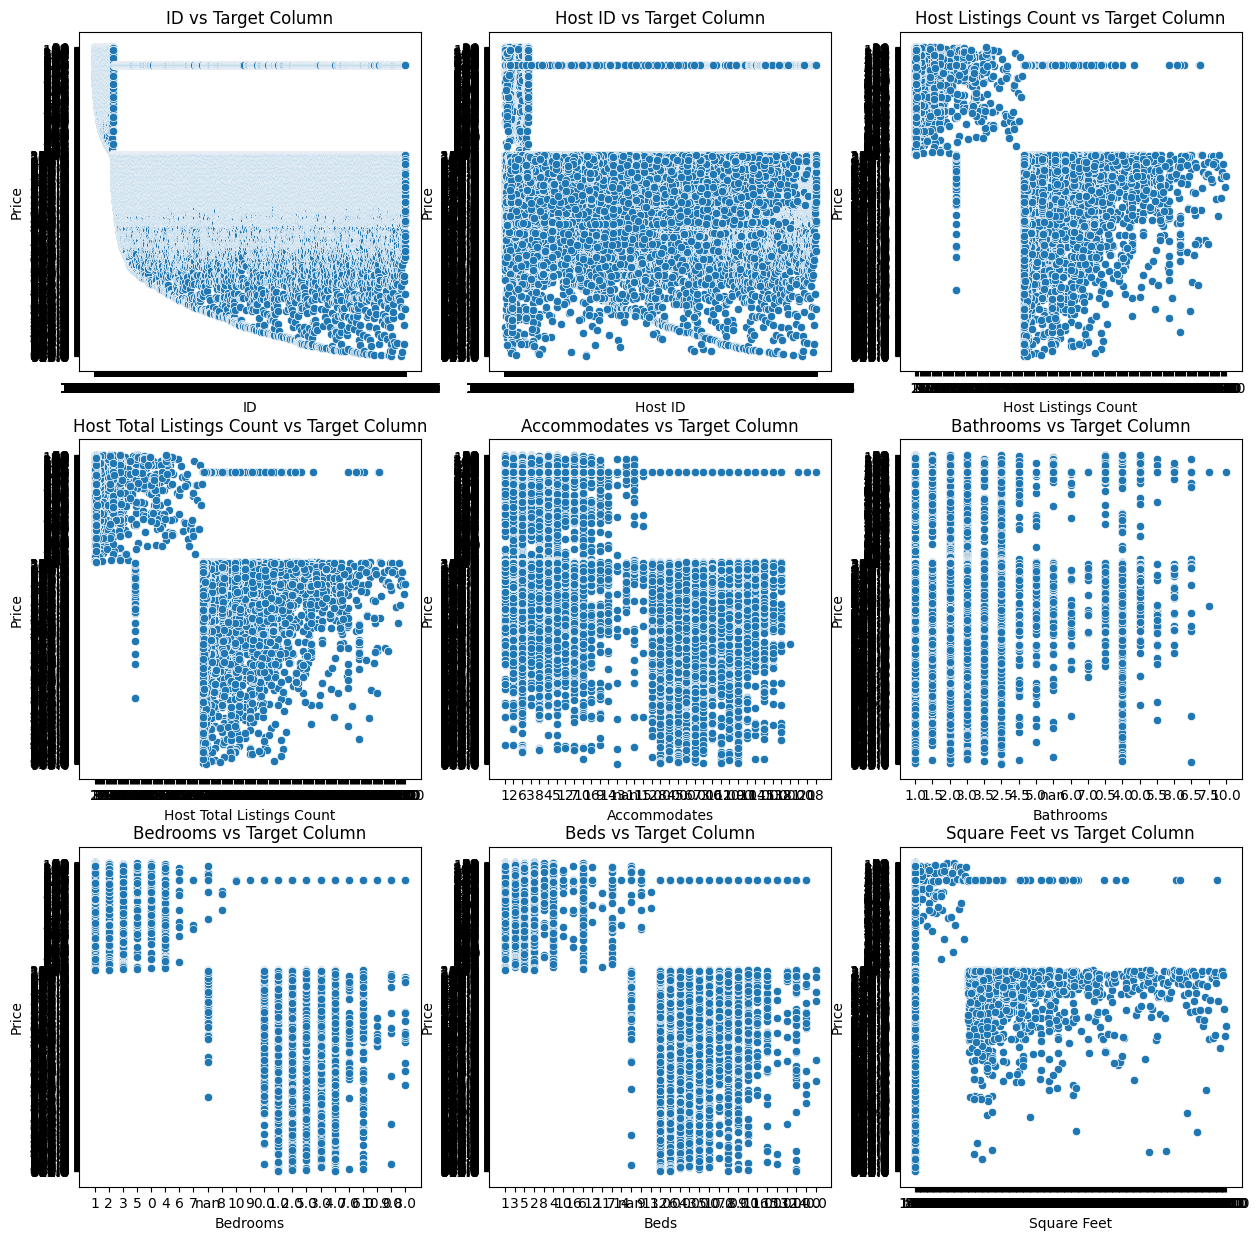

In [41]:
import seaborn as sns

for i in list(SBdf.columns):
    SBdf[i] = SBdf[i].astype(str)
print("out of loop")
columns = list(SBdf.columns)
#print(columns)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.scatterplot(x=column, y='Price', data=SBdf, ax=axs[i])
    axs[i].set_title(f'{column} vs Target Column')
print("out of second loop")
for i in range(len(columns), len(axs)):
    fig.delaxes(axs[i])
print("out of third loop")
plt.show()